In [1]:
import os
from moviepy.editor import *
import matplotlib.pyplot as plt
import numpy as np
from audio2numpy import open_audio

In [23]:
#packages required

#conda install ffmpeg
#pip install audio2numpy
# only need this once
# %pip install moviepy
#pip install imutils

In [3]:
os.getcwd()

'/home/giering'

In [4]:
#change to the directory of your data, video, audio etc
# if you're more clever, you can just load it
os.chdir('Downloads')

In [5]:
# using the moviepy.editor to strip the audio from the experiment mp4
clip = VideoFileClip('SterlingHot.mp4')
clip = clip.subclip(0,5)
audioclip = clip.audio


In [6]:
# save the audio from the mp4 video
audioclip.write_audiofile('StirlingAudio.mp3')

MoviePy - Writing audio in StirlingAudio.mp3
MoviePy - Done.


# To see the time-space representation we plot a spectrogram of the audio

In [14]:
# load the audio file created earlier
fp = 'StirlingAudio.mp3'
signal, sampling_rate = open_audio(fp)

In [15]:
# calculate the magnitude of the signal from the real and imaginary components
# just the pythagorean theorem
signal = [np.sqrt(x[0]**2+x[1]**2) for x in signal]

# Clicks of the Sterling Engine are seen as peaks of max audio amplitude 

In [16]:
#signal is the audio as a numpy matrix (array)
#spectrogram of first 5 seconds of audio. 
# You'll be interested in frequencies of about a second for the sterling engine, waydown at the bottom. I'll show you how to see just those. 
PowSpec, FreqFound, time, imageAxis = plt.specgram(signal, Fs = sampling_rate)

# It is simpler to visualize the dominant frequency of clicking via fft

In [18]:
signal, sampling_rate = open_audio(fp)
signal = signal[:,0]

In [37]:
# Python example - Fourier transform using numpy.fft method

import numpy as np
import matplotlib.pyplot as plotter

# How many time points are needed i,e., Sampling Frequency

#samplingFrequency   = 44100;
# At what intervals time points are sampled
samplingInterval = 1 / sampling_rate;
time = np.arange(0, 5, samplingInterval);

# Create subplot

figure, axis = plotter.subplots(3, 1)
figure.set_figwidth(20)
figure.set_figheight(10)
plotter.subplots_adjust(hspace=1)

# because of the impulse-like sound of interest, fft may not be our first choice
# We will filter the raw audio to remove all but the loudest (greatest signal) data points

# Time domain representation for audio

axis[0].set_title('Raw Audio')

axis[0].plot(time, signal)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('signal')


signal = signal * (signal > np.percentile(signal, 99.8))
# Time domain representation for audio

axis[1].set_title('Filtered Audio')

axis[1].plot(time, signal)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('signal')


# Frequency domain representation

fourierTransform = np.fft.fft(signal)/len(signal)           # Normalize signal

fourierTransform = fourierTransform[range(int(len(signal)/2))] # Exclude sampling frequency


 

tpCount     = len(signal)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/sampling_rate

frequencies = values/timePeriod


axis[2].set_title('Fourier transform depicting the frequency components')


axis[2].plot(frequencies[0:100], abs(fourierTransform[0:100]))

#primary frequency (other peaks are harmonics)
axis[2].axvline(x = 33/5, color = 'r', label = 'axvline - full height')

axis[2].set_xlabel('Frequency')

axis[2].set_ylabel('signal')

 
plt.clf
plt.show()

In [20]:
# where (index in the lisl) is the largest value at the beginning of the FT (ignoring the peak at 0)?
np.argmax(abs(fourierTransform[25:50]))+25

33

In [21]:
# freq value in hz (x-axis) of the first peak (primary frequency)
frequencies[33]
# fft primary peak is at 6.6hz

6.6

In [38]:
# this agrees with the value calculated by counting the number of peaks in 5 seconds from the raw graph
33/5

6.6

In [39]:
#This agreement confirms that we can calculate the correct frequency from audio

# Video Analysis

In [40]:
# play the original video data if you'd like
import numpy as np
import cv2

%matplotlib inline

cv2.startWindowThread()
# Open the Video
video = cv2. VideoCapture("SterlingHot.mp4")

while(video.isOpened()):
    ret, frame= video.read()
    if ret == False:
        break    
    cv2.imshow("Video", frame)
    
    
    if cv2.waitKey(1) ==ord('q') :
        break
    
video.release()
cv2.destroyAllWindows()

In [28]:
#This command saves seconds 5-10 of an mp4 video to another file ...os_test.mp4 and save it
os.system('ffmpeg -i SterlingHot2.mp4 -ss 00:00:05 -t 00:00:10 -c:v copy -c:a copy SterlingHot_os_test.mp4')

# if you wanted to grab pieces of a video
# create the string inside the os.system command first
# s = 'ffmpeg -i SterlingHot2.mp4 -ss' + 'blah blah blah' (ask for help if needed)
#os.system(s)


256

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

frame_count=0
motion = 0
piston_area = []

# Open the Video
video = cv2. VideoCapture("SterlingHot3.mp4")
# read the fiurst frame  of the video as the initial background image
ret, Prev_frame= video.read()
while(video.isOpened()):
    frame_count+=1
    
    ##capture frame by frame
    ret, Current_frame= video.read()
    if ret == False:
        break
    
    # Find the absolute difference between the pixels of the prev_frame and current_frame
    #absdiff(0) will extract just the pixels of the objects that are moving between the two frames
    frame_diff= cv2.absdiff(Current_frame, Prev_frame)
    
    # applying Gray scale to the images to transformfrom color to grayscale, 
    frame_diff= cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
    # blur
    frame_diff= cv2.GaussianBlur(frame_diff, (5,5), 0)
    #apply threshold
    frame_diff= cv2.threshold(frame_diff, 100,255, cv2.THRESH_BINARY)[1]
    # fill the gaps by dialiting the image
    #frame_diff = cv2.dilate(frame_diff,None, iterations=4 )
    
    motion+=1
    piston_area.append(sum(sum(frame_diff)))
    
    cv2.imshow("Absolute Diff", frame_diff)
    #cv2.imwrite("frame%d.jpg" % frame_count , frame_diff)
    
    if cv2.waitKey(1) == ord('q'):
        break
    #Prev_frame=Current_frame
video.release()
cv2.destroyAllWindows()

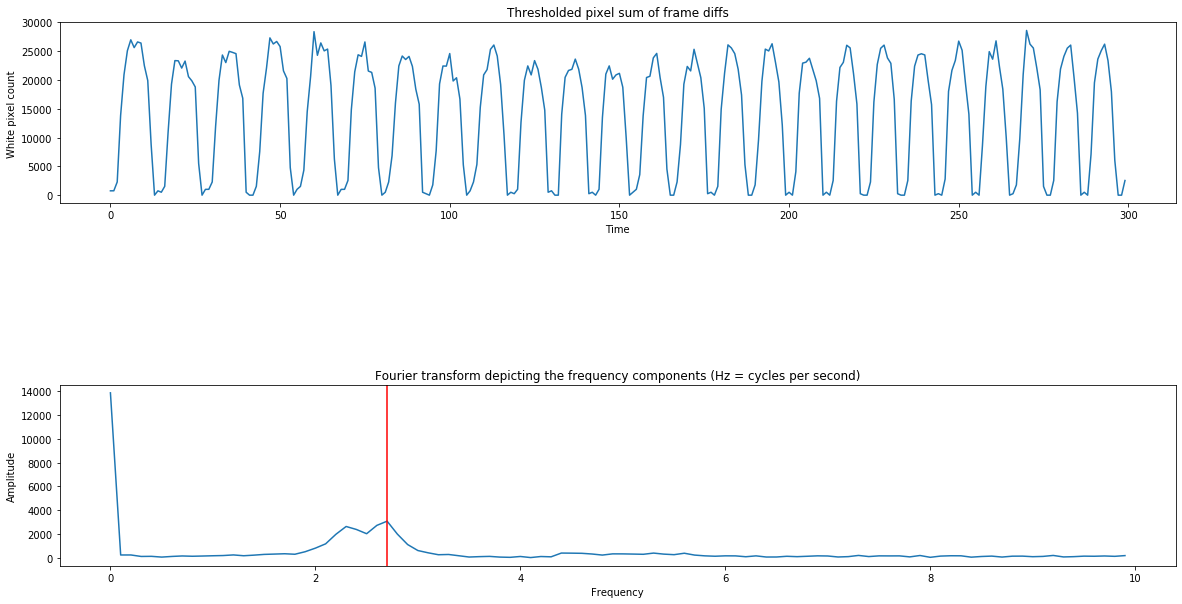

In [32]:
#Take the Fourier transform of the pixel count data to see what frequency it oscillates at
# Frequency domain representation

fourierTransform = np.fft.fft(piston_area)/len(piston_area)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(piston_area)/2))] # Exclude sampling frequency

samplingFrequency = 30 #mp4 runs at 24 fps

tpCount     = len(piston_area)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

figure, axis = plt.subplots(2, 1)
figure.set_figwidth(20)
figure.set_figheight(10)
plt.subplots_adjust(hspace=1)

axis[0].set_title('Thresholded pixel sum of frame diffs')

axis[0].plot(piston_area)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('White pixel count')


axis[1].set_title('Fourier transform depicting the frequency components (Hz = cycles per second)')


axis[1].plot(frequencies[0:100], abs(fourierTransform[0:100]))

#primary frequency (other peaks are harmonics)
peakpos = np.argmax(abs(fourierTransform[20:100]))+20

axis[1].axvline(x = frequencies[peakpos], color = 'r', label = 'axvline - full height')

axis[1].set_xlabel('Frequency')

axis[1].set_ylabel('Amplitude')

 
plt.clf
plt.show()

In [41]:
#number of pixels in each frame
# just in case you're curious
frame_diff.shape

(1080, 1920)

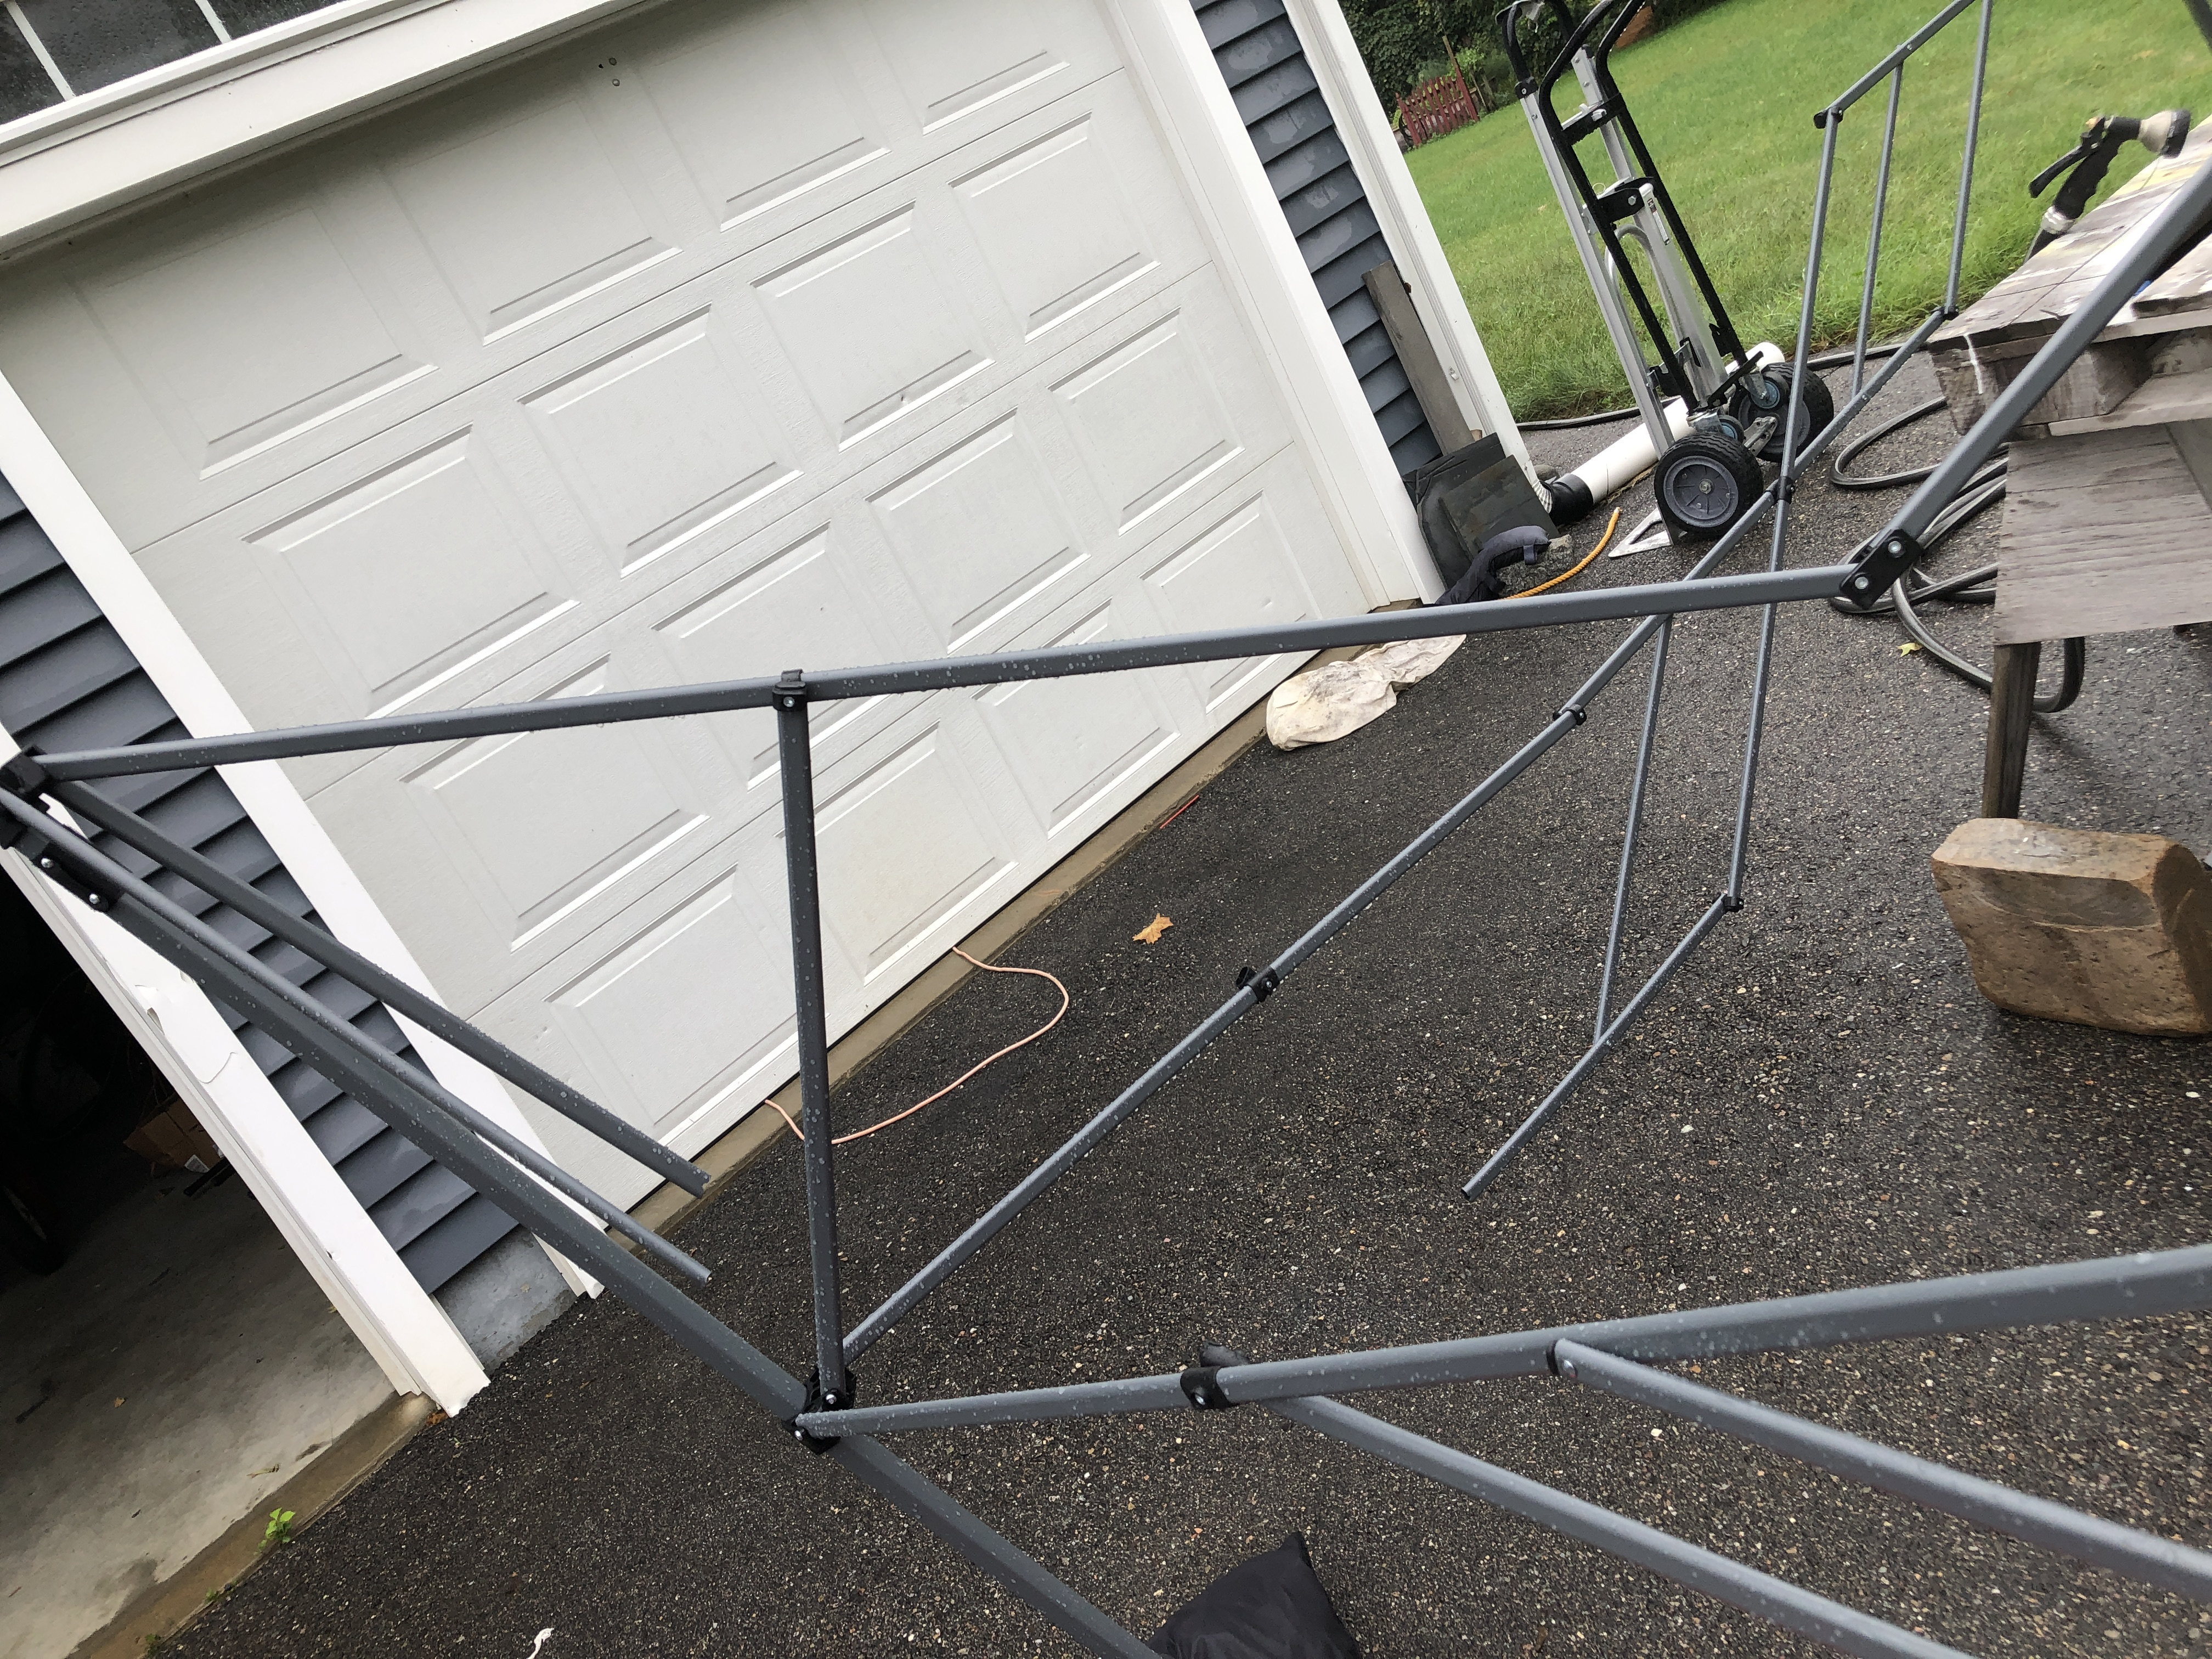

In [42]:
# demo of how to show a pic from a local directory
from IPython.display import Image
Image(filename='IMG_3294.JPG',width = 100, height = 50) 
